In [13]:
%matplotlib inline 
import pandas as pd
import numpy as np
import xarray as xr
import os
import glob
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

In [14]:
# flist = glob.glob('')#bsu
flist = sorted(glob.glob('/Users/megmason/research/sierra/data/compiled_SUPERsnow_*150m*')) #mac
flist

['/Users/megmason/research/sierra/data/compiled_SUPERsnow_150m_dan.nc',
 '/Users/megmason/research/sierra/data/compiled_SUPERsnow_150m_sli.nc',
 '/Users/megmason/research/sierra/data/compiled_SUPERsnow_150m_tum.nc']

['/Users/megmason/research/sierra/data/complied_SUPERsnow_150m_dan2.nc',
 '/Users/megmason/research/sierra/data/complied_SUPERsnow_150m_sli2.nc copy',
 '/Users/megmason/research/sierra/data/complied_SUPERsnow_150m_tum2.nc']

In [38]:
#open with MULTI-File
ds = xr.open_mfdataset(flist, concat_dim=('time'))#, chunks={'time':1,'x':1000,'y':1000})
stns = ['DAN', 'SLI', 'TUM'] #met station names
ds['met'] = (['met'], stns) #assign names and add as coords
ds.close()
ds

<xarray.Dataset>
Dimensions:  (met: 3, time: 153, x: 150, y: 150)
Coordinates:
  * x        (x) float64 2.866e+05 2.866e+05 2.866e+05 ... 3.016e+05 3.016e+05
  * y        (y) float64 4.195e+06 4.195e+06 4.195e+06 ... 4.219e+06 4.219e+06
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (time, y, x) float64 dask.array<shape=(153, 150, 150), chunksize=(51, 150, 150)>
    dem      (time, y, x) float32 dask.array<shape=(153, 150, 150), chunksize=(51, 150, 150)>
    veg      (time, y, x) float32 dask.array<shape=(153, 150, 150), chunksize=(51, 150, 150)>
  * met      (met) <U3 'DAN' 'SLI' 'TUM'
Data variables:
    snow     (time, y, x) float64 dask.array<shape=(153, 150, 150), chunksize=(51, 150, 150)>

In [20]:
# open 3 different datasets
dan = xr.open_dataset(flist[0])
sli = xr.open_dataset(flist[1])
tum = xr.open_dataset(flist[2])

<xarray.Dataset>
Dimensions:  (time: 51, x: 51, y: 51)
Coordinates:
  * x        (x) float32 301431.0 301434.0 301437.0 ... 301578.0 301581.0
  * y        (y) float32 4196760.0 4196757.0 4196754.0 ... 4196613.0 4196610.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
Data variables:
    snow     (time, y, x) int16 ...
<xarray.Dataset>
Dimensions:  (time: 51, x: 51, y: 50)
Coordinates:
  * x        (x) float32 293409.0 293412.0 293415.0 ... 293556.0 293559.0
  * y        (y) float32 4194774.0 4194771.0 4194768.0 ... 4194630.0 4194627.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
Data variables:
    snow     (time, y, x) int16 ...
<xarray.Dataset>
Dimensions:  (time: 51, x: 50, y: 50)
Coordinates:
  * x        (x) float32 286635.0 286638.0 286641.0 ..

In [32]:
dan2=dan.snow[:,:-1,:-1]
tum2=tum.snow[:,:,:-1]

dan2.to_netcdf('/Users/megmason/research/sierra/data/complied_SUPERsnow_150m_dan2.nc')
tum2.to_netcdf('/Users/megmason/research/sierra/data/complied_SUPERsnow_150m_tum2.nc')

print(dan2)
print(tum2)


<xarray.DataArray 'snow' (time: 51, y: 50, x: 50)>
[127500 values with dtype=int16]
Coordinates:
  * x        (x) float32 301431.0 301434.0 301437.0 ... 301575.0 301578.0
  * y        (y) float32 4196760.0 4196757.0 4196754.0 ... 4196616.0 4196613.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
<xarray.DataArray 'snow' (time: 51, y: 50, x: 50)>
[127500 values with dtype=int16]
Coordinates:
  * x        (x) float32 293409.0 293412.0 293415.0 ... 293553.0 293556.0
  * y        (y) float32 4194774.0 4194771.0 4194768.0 ... 4194630.0 4194627.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...


x direction length 14946.0 [m]:
y direction length 24273.0 [m]:


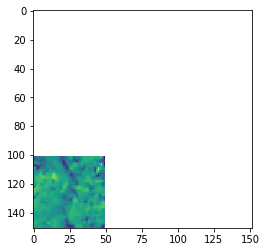

In [11]:
#mf dataset....x and y are whole basin!
f = ds.snow.isel(time=31)
f = f.sel(met='SLI')

plt.imshow(f)

print('x direction length {} [m]:'.format(f.x.max().values - f.x.min().values))
print('y direction length {} [m]:'.format(f.y.max().values - f.y.min().values))

<xarray.Dataset>
Dimensions:  (x: 51, y: 51)
Coordinates:
  * x        (x) float32 301431.0 301434.0 301437.0 ... 301578.0 301581.0
  * y        (y) float32 4196760.0 4196757.0 4196754.0 ... 4196613.0 4196610.0
    time     datetime64[ns] 2016-04-26
    mask     (y, x) uint8 ...
    dem      (y, x) float32 ...
    veg      (y, x) float32 ...
Data variables:
    snow     (y, x) int16 ...
x direction length 150.0 [m]:
y direction length 150.0 [m]:


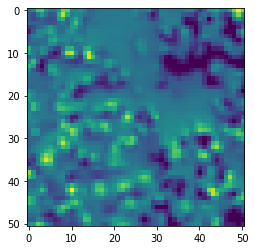

In [12]:
# open one dataset at a time
d = dan.isel(time=31)
print(d)
plt.imshow(d.snow)

print('x direction length {} [m]:'.format(dan.x.max().values - dan.x.min().values))
print('y direction length {} [m]:'.format(dan.y.max().values - dan.y.min().values))

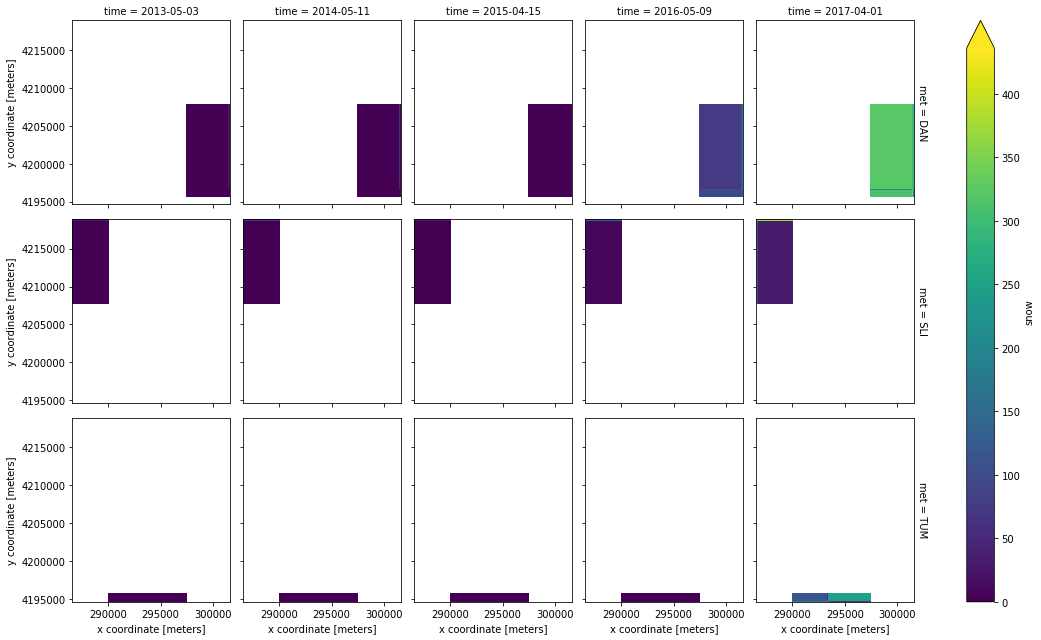

In [35]:
# awesome!! .. if I can get x and y extents correct
snow = ds.snow.isel(time=slice(2,51,10))
s = snow.plot(x='x', y='y', col='time', row='met', robust=True)


In [ ]:
#extra....

# #open data (MULTIFILE....)
# ds = xr.open_mfdataset(flist, concat_dim='met')#, chunks={'time':1,'x':1000,'y':1000})
# stns = ['DAN', 'SLI', 'TUM'] #met station names
# ds['met'] = (['met'], stns) #assign names and add as coords
# ds.close()
# ds

# for i in stns:
#     print(i)
#     ds.sel(met=stns).snow.plot()
#     plt.title('{}'.format(i))
#     plt.show()